# LeNet_demo_1018


## import部分

In [2]:
%matplotlib inline
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# 每個 MNIST 中的圖片都有一個對應的 label 也就是從 0 到 9 的數值．
# 在這裡每個 label 都是一個 one-hot vectors
# one-hot vector 是指說只有一個維度是 1 其他都是 0
# 例如 label 0 的表示法就是 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


# 資料型態


In [4]:
print ("讓我們看一下 MNIST 訓練還有測試的資料集長得如何")
#print ("mnist資料型態 : %s " %(type(mnist)))
print ("mnist資料型態 : " + str(type(mnist)))
print ("training sample 共有 %s 個"%(mnist.train.num_examples))
print ("validation sample 共有 %s 個" %(mnist.validation.num_examples))
print ("testing sample 共有 %s 個"  %(mnist.test.num_examples))
train_img = mnist.train.images
train_label = mnist.train.labels
test_img = mnist.test.images
test_label = mnist.test.labels
print
print("train_img 的 type : %s" % (type(train_img)))
print("train_img 的 dimension : %s" % (train_img.shape,))
print("train_label 的 type : %s" % (type(train_label)))
print("train_label 的 dimension : %s" % (train_label.shape,))
print("test_img 的 type : %s" % (type(test_img)))
print("test_img 的 dimension : %s" % (test_img.shape,))
print("test_label 的 type : %s" % (type(test_label)))
print("test_label 的 dimension : %s" % (test_label.shape,))

讓我們看一下 MNIST 訓練還有測試的資料集長得如何
mnist資料型態 : <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
training sample 共有 55000 個
validation sample 共有 5000 個
testing sample 共有 10000 個
train_img 的 type : <class 'numpy.ndarray'>
train_img 的 dimension : (55000, 784)
train_label 的 type : <class 'numpy.ndarray'>
train_label 的 dimension : (55000, 10)
test_img 的 type : <class 'numpy.ndarray'>
test_img 的 dimension : (10000, 784)
test_label 的 type : <class 'numpy.ndarray'>
test_label 的 dimension : (10000, 10)


# 函數定義區

In [5]:
def reshape_pic(origin, size, channel, xsnum):
    pic = origin[xsnum] #第num張照片 
    ch = pic.transpose(2,0,1).reshape([channel,-1]) #將照片拉成數個channel
    out = ch.reshape([size*channel,size]) #將第cnum的channel照片拉成28x28
#     print("\n*********************************************************************************\n")    
#     print ("pic shape:" + str(pic.shape))
#     print ("ch shape:" + str(ch.shape))
    print ("output shape:" + str(out.shape))
#     print("\n*********************************************************************************\n")
    return out


In [6]:
 def print_pic_int(x):
    print("\n*********************************************************************************\n")

    j = 0
    while j < (x.shape[0]) :
        print (str(int(round(x[j,0])))+ " "+ str(int(round(x[j,1])))
            + " "+ str(int(round(x[j,2])))+ " "+ str(int(round(x[j,3])))
            + " "+ str(int(round(x[j,4])))+ " "+ str(int(round(x[j,5])))
            + " "+ str(int(round(x[j,6])))+ " "+ str(int(round(x[j,7])))
            + " "+ str(int(round(x[j,8])))+ " "+ str(int(round(x[j,9])))
            + " "+ str(int(round(x[j,10])))+ " "+ str(int(round(x[j,11])))
            + " "+ str(int(round(x[j,12])))+ " "+ str(int(round(x[j,13])))
            + " "+ str(int(round(x[j,14])))+ " "+ str(int(round(x[j,15])))
            + " "+ str(int(round(x[j,16])))+ " "+ str(int(round(x[j,17])))
            + " "+ str(int(round(x[j,18])))+ " "+ str(int(round(x[j,19])))
            + " "+ str(int(round(x[j,20])))+ " "+ str(int(round(x[j,21])))
            + " "+ str(int(round(x[j,22])))+ " "+ str(int(round(x[j,23])))
            + " "+ str(int(round(x[j,24])))+ " "+ str(int(round(x[j,25])))
            + " "+ str(int(round(x[j,26])))+ " "+ str(int(round(x[j,27]))))
        j += 1    
        if(j% (x.shape[1]) == 0):
            print("\n*********************************************************************************\n")
        

In [7]:
def print_pic_prec(x , prec):
    print ("test printing by num:")
    i = 0
    print("\n*********************************************************************************\n")
    
    while i < (x.shape[0]) :
        print  (str(round(x[i,0], prec))+ "\t"+ str(round(x[i,1], prec))
            + "\t"+ str(round(x[i,2], prec))+ "\t"+ str(round(x[i,3], prec))
            + "\t"+ str(round(x[i,4], prec))+ "\t"+ str(round(x[i,5], prec))
            + "\t"+ str(round(x[i,6], prec))+ "\t"+ str(round(x[i,7], prec))
            + "\t"+ str(round(x[i,8], prec))+ "\t"+ str(round(x[i,9], prec))
            + "\t"+ str(round(x[i,10], prec))+ "\t"+ str(round(x[i,11], prec))
            + "\t"+ str(round(x[i,12], prec))+ "\t"+ str(round(x[i,13], prec))
            + "\t"+ str(round(x[i,14], prec))+ "\t"+ str(round(x[i,15], prec))
            + "\t"+ str(round(x[i,16], prec))+ "\t"+ str(round(x[i,17], prec))
            + "\t"+ str(round(x[i,18], prec))+ "\t"+ str(round(x[i,19], prec))
            + "\t"+ str(round(x[i,20], prec))+ "\t"+ str(round(x[i,21], prec))
            + "\t"+ str(round(x[i,22], prec))+ "\t"+ str(round(x[i,23], prec))
            + "\t"+ str(round(x[i,24], prec))+ "\t"+ str(round(x[i,25], prec))
            + "\t"+ str(round(x[i,26], prec))+ "\t"+ str(round(x[i,27], prec)))
        i += 1
        if(i% (x.shape[1]) == 0):
             print("\n*********************************************************************************\n")

In [8]:
trainimg = mnist.train.images
trainlabel = mnist.train.labels
nsample = 1
randidx = np.random.randint(trainimg.shape[0], size=nsample)

#testdata = 54999 #data no. 0- 54999 total 55000
#x = trainimg[testdata]

#prec = 1 #precision
#print_pic(x,1)


In [9]:
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):
    initial = tf.truncated_normal(shape,mean=0, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    # stride [1, x_movement, y_movement, 1]
    # Must have strides[0] = strides[3] = 1
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    # stride [1, x_movement, y_movement, 1]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')


# CNN 訓練過程

In [10]:

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784])/255.   # 28x28
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])
# print(x_image.shape)  # [n_samples, 28,28,1]

## conv1 layer ##
W_conv1 = weight_variable([5,5,1,6]) # patch 5x5, in size 1, out size 32
b_conv1 = bias_variable([6])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 28x28x32
h_pool1 = max_pool_2x2(h_conv1)                                         # output size 14x14x32

## conv2 layer ##
W_conv2 = weight_variable([5,5, 6, 16]) # patch 5x5, in size 32, out size 64
b_conv2 = bias_variable([16])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) # output size 14x14x64
h_pool2 = max_pool_2x2(h_conv2)                                         # output size 7x7x64

## fc1 layer ##
W_fc1 = weight_variable([7*7*16, 120])
b_fc1 = bias_variable([120])
# [n_samples, 7, 7, 64] ->> [n_samples, 7*7*64]
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*16])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## fc2 layer ##
W_fc2 = weight_variable([120, 10])
b_fc2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

sess = tf.Session()
# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)
for i in range(1):
    batch_xs, batch_ys = mnist.train.next_batch(100)

# 印出結果---input


第1張圖的 shape : (?, 28, 28, 1)
output shape:(28, 28)
output shape:(28, 28)
test printing by num:

*********************************************************************************

0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0

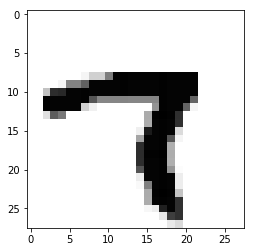

In [11]:
print ("第1張圖的 shape : " + str(x_image.shape))
px1 = sess.run(x_image, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
plt.imshow(reshape_pic(px1,28,1,0), cmap='Greys')  

print_pic_prec(reshape_pic(px1,28,1,0),5)
print_pic_int(reshape_pic(px1,28,1,0))

# 印出結果---conv 1層

conv1 shape : (?, 28, 28, 6)
output shape:(168, 28)
output shape:(168, 28)
test printing by num:

*********************************************************************************

0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1
0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1
0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1
0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1
0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1
0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1
0.1	0.1	0.1	0.1	0.1	0.11	0.126	0.093	0.085	0.109	0.04	0.0	0.0	0.015	0.016	0.016	0.015	0.014	0.015	0.016	0.0	0.0	0.178	0.215	0.1	0.1	0.1	0.1
0.1	0.1

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

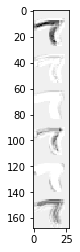

In [12]:
    print ("conv1 shape : " + str(h_conv1.shape))
    pC1 = sess.run(h_conv1, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    plt.imshow(reshape_pic(pC1,28,6,0), cmap='Greys')

    print_pic_prec(reshape_pic(pC1,28,6,0),3)
    print_pic_int(reshape_pic(pC1,28,6,0))
    
    # print("\n*********************************************************************************\n")
    # print ("reshape pic shape:" + str((reshape_pic(pC1,28,6,0)).shape))
    # print ("content:\n" + str(reshape_pic(pC1,28,6,0)))
    # print("\n*********************************************************************************\n")

# 印出 filter

In [19]:
# print_pic_prec(reshape_pic(W_conv1,5,6,0),2)
print (sess.run(W_conv1[0]).shape)
print (sess.run(W_conv1).shape)
i = 0
filter_no = 0
while i < 5:
    print (str(sess.run(W_conv1[0,i,0,filter_no]))+"\t"
    +str(sess.run(W_conv1[1,i,0,filter_no]))+"\t"
    +str(sess.run(W_conv1[2,i,0,filter_no]))+"\t"
    +str(sess.run(W_conv1[3,i,0,filter_no]))+"\t"
    +str(sess.run(W_conv1[4,i,0,filter_no]))+"\t")
    i+=1

# print (sess.run(W_conv1[0], feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5}))


(5, 1, 6)
(5, 5, 1, 6)
-0.0690262	-0.094957	0.113199	-0.0804385	0.116114	
-0.11677	0.0440064	0.13096	-0.0314925	-0.0372607	
0.0268401	-0.0734224	0.1848	0.0811576	-0.197763	
-0.0687699	0.0496836	0.00363541	-0.0290858	-0.0824294	
0.17162	0.0709396	0.157214	0.0410682	0.115902	


# 印出結果---pool 1層

pool1 shape : (?, 14, 14, 6)
output shape:(84, 14)


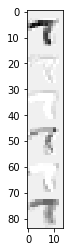

In [14]:
    print ("pool1 shape : " + str(h_pool1.shape))
    pH1 = sess.run(h_pool1, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    plt.imshow(reshape_pic(pH1,14,6,0), cmap='Greys')
    
    #print_pic_prec(reshape_pic(pH1,14,6,0),3)
    #print_pic_int(reshape_pic(pH1,14,6,0))

# 印出結果---conv 2層

conv2 shape : (?, 14, 14, 16)
output shape:(224, 14)


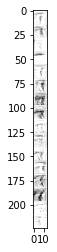

In [15]:
    print ("conv2 shape : " + str(h_conv2.shape))
    pC2 = sess.run(h_conv2, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    plt.imshow(reshape_pic(pC2,14,16,0), cmap='Greys')
    
    #print_pic_prec(reshape_pic(pC2,14,16,0),3)
    #print_pic_int(reshape_pic(pC2,14,16,0))

# 印出結果---pool 2層

pool2 shape : (?, 7, 7, 16)
output shape:(112, 7)


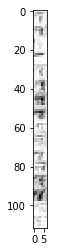

In [16]:
    print ("pool2 shape : " + str(h_pool2.shape))
    pH2 = sess.run(h_pool2, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    plt.imshow(reshape_pic(pH2,7,16,0), cmap='Greys')
    
    #print_pic_prec(reshape_pic(pH2,7,16,0),3)
    #print_pic_int(reshape_pic(pH2,7,16,0))

# 印出結果---fc 1層

In [17]:
    print ("fc1 shape : " + str(h_fc1[0].shape))
    print("\n*********************************************************************************\n")
    print (sess.run(h_fc1[0], feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5}))

fc1 shape : (120,)

*********************************************************************************

[ 0.62424624  0.39824978  0.25970542  0.          0.9566257   0.65274411
  0.          0.          0.          0.0703119   2.19145966  0.08869614
  0.3329052   0.93941379  0.33689576  0.23021379  0.          0.15592751
  0.38913211  0.26461107  0.          0.85009909  1.27821624  0.40452495
  0.09180168  0.79480278  0.          0.45292661  0.66172951  1.91651094
  0.          0.73345256  0.          0.68438339  0.33738804  0.14193749
  0.09784809  0.2882801   0.          0.          0.6996451   0.56928426
  0.          0.821697    0.82327056  0.02020011  0.16196115  0.99379241
  0.          0.          0.4553318   0.          0.          0.
  0.98221171  0.20457914  0.          0.82145607  0.13629335  0.35011354
  0.33637524  0.63171881  0.27760935  0.          0.          0.48645699
  0.60105562  0.          0.91962302  0.          0.673195    0.          0.
  0.          0.11418692 

# 印出結果---fc 2層

In [18]:
    print ("prediction shape : " + str(prediction[0].shape))
    print("\n*********************************************************************************\n")
    print (sess.run(prediction[0], feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5}))
#     pH2 = sess.run(h_pool2, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
#     plt.imshow(reshape_pic(pH2,7,16,0), cmap='Greys')

prediction shape : (10,)

*********************************************************************************

[ 0.07002032  0.07362318  0.1826196   0.0546982   0.14001799  0.10946143
  0.05765972  0.18945755  0.09737052  0.02507153]
